<a href="https://colab.research.google.com/github/aleshkovskijjaaa/--PY1/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа 2

*   Алешковский A.A.
*   5140901/31502




<ipython-input-1-ffa460b35e73>:61: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=200.
  ani = animation.FuncAnimation(


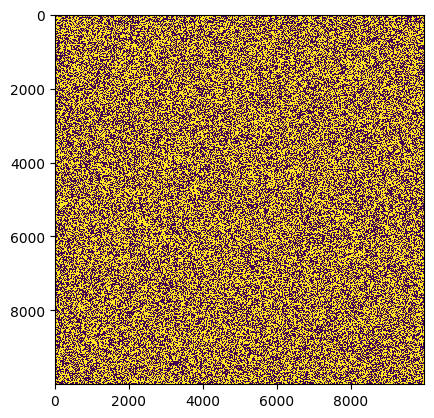

Время выполнения с мультипроцессингом: 3.46 секунд


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

def initialize_grid(size):
    """Инициализирует сетку случайными значениями (0 или 1)."""
    return np.random.randint(2, size=(size, size))

def get_neighbors(grid, x, y):
    """Возвращает список значений соседних клеток для клетки (x, y)."""
    neighbors = [
        grid[(x-1) % grid.shape[0], (y-1) % grid.shape[1]],
        grid[(x-1) % grid.shape[0], y % grid.shape[1]],
        grid[(x-1) % grid.shape[0], (y+1) % grid.shape[1]],
        grid[x % grid.shape[0], (y-1) % grid.shape[1]],
        grid[x % grid.shape[0], (y+1) % grid.shape[1]],
        grid[(x+1) % grid.shape[0], (y-1) % grid.shape[1]],
        grid[(x+1) % grid.shape[0], y % grid.shape[1]],
        grid[(x+1) % grid.shape[0], (y+1) % grid.shape[1]]
    ]
    return neighbors

def update_cell(args):
    """Обновляет состояние одной клетки на основе соседей."""
    grid, x, y = args
    neighbors = get_neighbors(grid, x, y)
    alive_neighbors = sum(neighbors)

    if grid[x, y] == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

def update_grid_multiprocessing(grid, size, num_processes):
    """Обновляет всю сетку параллельно."""
    with mp.Pool(num_processes) as pool:
        result = pool.map(update_cell, [(grid, x, y) for x in range(size) for y in range(size)])
    return np.array(result).reshape(size, size)

def animate_multiprocessing(frame_num, img, grid, size, num_processes):
    """Анимация одного кадра с мультипроцессингом."""
    new_grid = update_grid_multiprocessing(grid, size, num_processes)
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

def run_game_of_life_multiprocessing(size, steps, num_processes):
    """Запускает игру жизни с визуализацией и использованием мультипроцессинга."""
    grid = initialize_grid(size)

    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(
        fig, animate_multiprocessing, fargs=(img, grid, size, num_processes),
        frames=steps, interval=200, save_count=50
    )

    plt.show()

if __name__ == "__main__":
    size = 10000  # размер сетки 100x100
    steps = 200  # количество шагов
    num_processes = mp.cpu_count()  # количество процессов равно количеству ядер CPU

    start_time = time.time()
    run_game_of_life_multiprocessing(size, steps, num_processes)
    multiprocessing_duration = time.time() - start_time
    print(f"Время выполнения с мультипроцессингом: {multiprocessing_duration:.2f} секунд")


<ipython-input-2-25907f7d26b8>:61: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=200.
  ani = animation.FuncAnimation(


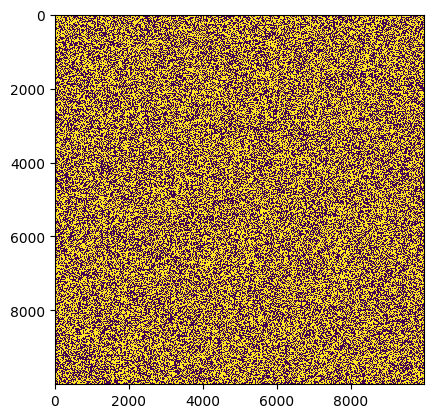

Время выполнения без мультипроцессинга: 4.44 секунд


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

def initialize_grid(size):
    """Инициализирует сетку случайными значениями (0 или 1)."""
    return np.random.randint(2, size=(size, size))

def get_neighbors(grid, x, y):
    """Возвращает список значений соседних клеток для клетки (x, y)."""
    neighbors = [
        grid[(x-1) % grid.shape[0], (y-1) % grid.shape[1]],
        grid[(x-1) % grid.shape[0], y % grid.shape[1]],
        grid[(x-1) % grid.shape[0], (y+1) % grid.shape[1]],
        grid[x % grid.shape[0], (y-1) % grid.shape[1]],
        grid[x % grid.shape[0], (y+1) % grid.shape[1]],
        grid[(x+1) % grid.shape[0], (y-1) % grid.shape[1]],
        grid[(x+1) % grid.shape[0], y % grid.shape[1]],
        grid[(x+1) % grid.shape[0], (y+1) % grid.shape[1]]
    ]
    return neighbors

def update_cell(grid, x, y):
    """Обновляет состояние одной клетки на основе соседей."""
    neighbors = get_neighbors(grid, x, y)
    alive_neighbors = sum(neighbors)

    if grid[x, y] == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

def update_grid(grid, size):
    """Обновляет всю сетку последовательно."""
    new_grid = np.zeros((size, size), dtype=int)
    for x in range(size):
        for y in range(size):
            new_grid[x, y] = update_cell(grid, x, y)
    return new_grid

def animate(frame_num, img, grid, size):
    """Анимация одного кадра без мультипроцессинга."""
    new_grid = update_grid(grid, size)
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

def run_game_of_life(size, steps):
    """Запускает игру жизни с визуализацией без использования мультипроцессинга."""
    grid = initialize_grid(size)

    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(
        fig, animate, fargs=(img, grid, size),
        frames=steps, interval=200, save_count=50
    )

    plt.show()

if __name__ == "__main__":
    size = 10000  # размер сетки 100x100
    steps = 200  # количество шагов

    start_time = time.time()
    run_game_of_life(size, steps)
    sequential_duration = time.time() - start_time
    print(f"Время выполнения без мультипроцессинга: {sequential_duration:.2f} секунд")


Если размер сетки и количество шагов достаточно большие, мы должны увидеть значительное снижение времени выполнения при использовании мультипроцессинга, особенно на многоядерных системах. Для меньших сеток или коротких анимаций разница может быть не так заметна из-за накладных расходов на управление процессами.